In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install --upgrade tqdm
!pip install pytorch-lightning

     |████████████████████████████████| 675kB 6.5MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 276kB 25.3MB/s 
     |████████████████████████████████| 829kB 29.4MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44620 sha256=0eb33bb22815b2b254897a2fc378c158bac78cc9cad84b874169108db4e205c4
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=7f57ab1dba80c247a97526faf83a73355f0a451544c2b43896c1eb5f21e7115d
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built PyYAML future
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully unin

### 1. Extracting the Data Points from Collected Data

In [1194]:
import os, pickle, time, multiprocessing
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from itertools import chain


main_dir="/content/drive/MyDrive/University of Maryland/Fall'2020/818W_Intro_to_IoT/Data/"
# filename='uniprot_sprot.fasta'
files_list = [files for files in os.listdir(main_dir)]

frames = []
files_list

['Water+Tablet test1.csv',
 'Water+Tablet test2.csv',
 'Water+Tablet test3.csv',
 'Water+Tablet test4.csv',
 'Water+Tablet test5.csv',
 'Water+Tablet+Alcohol test1.csv',
 'Water+Tablet+Alcohol test2.csv',
 'Water+Tablet+Alcohol test3.csv',
 'Water+Tablet+Alcohol test4.csv',
 'Water+Tablet+Alcohol test5.csv',
 'Water+Milk test1.csv',
 'Water+Milk test2.csv',
 'Water+Milk test3.csv',
 'Water+Milk test4.csv',
 'Water+Milk test5.csv',
 'Water+Oil test1.csv',
 'Water+Oil test2.csv',
 'Water+Oil test3.csv',
 'Water+Oil test4.csv',
 'Water+Oil test5.csv',
 'Soda test1.csv',
 'Milk test4.csv',
 'Water test5.csv',
 'Water test4.csv',
 'Milk test5.csv',
 'Soda test3.csv',
 'Soda test2.csv',
 'Water test1.csv',
 'Milk test1.csv',
 'Milk test2.csv',
 'Soda test5.csv',
 'Soda test4.csv',
 'Milk test3.csv',
 'Water test3.csv',
 'Water test2.csv',
 'Olive oil test5.csv',
 'Coffee test4.csv',
 'Olive oil test4.csv',
 'Alcohol test1.csv',
 'Coffee test5.csv',
 'Alcohol test3.csv',
 'Alcohol test2.csv',

In [1195]:
for items in files_list:
  df_temp = pd.read_csv(os.path.join(main_dir,items))
  df_temp.reset_index(inplace=True, drop=True)
  frames.append(df_temp)

df = pd.concat(frames, ignore_index=True)
df.head()

,Unnamed: 0,Material,Green_sensor,Green_IR,Green_UV,Blue_sensor,Blue_IR,Blue_UV,Red_sensor,Red_IR,Red_UV,IR_sensor,IR_IR,IR_UV
0,0,Water+Tablet,261.0,254.0,2.0,262.0,255.0,3.0,261.0,255.0,2.0,261.0,260.0,2.0
1,1,Water+Tablet,261.0,254.0,2.0,261.0,253.0,1.0,260.0,255.0,2.0,261.0,260.0,1.0
2,2,Water+Tablet,261.0,254.0,2.0,262.0,253.0,3.0,259.0,256.0,1.0,261.0,260.0,2.0
3,3,Water+Tablet,260.0,254.0,2.0,262.0,254.0,2.0,261.0,255.0,2.0,260.0,260.0,2.0
4,4,Water+Tablet,261.0,254.0,2.0,261.0,254.0,2.0,260.0,255.0,2.0,262.0,259.0,3.0


In [1196]:
df = df.drop(columns=['Unnamed: 0'])

for column in df.columns:
  # print(column)
  if not column == 'Material':
    max = df[column].max()
    # print(max)
    df[column] = df[column].div(max).round(5)

df.head()

,Material,Green_sensor,Green_IR,Green_UV,Blue_sensor,Blue_IR,Blue_UV,Red_sensor,Red_IR,Red_UV,IR_sensor,IR_IR,IR_UV
0,Water+Tablet,0.98864,0.49804,0.5,0.99242,0.49902,0.75,0.98864,0.49902,0.50,0.99240,0.50980,0.66667
1,Water+Tablet,0.98864,0.49804,0.5,0.98864,0.49511,0.25,0.98485,0.49902,0.50,0.99240,0.50980,0.33333
2,Water+Tablet,0.98864,0.49804,0.5,0.99242,0.49511,0.75,0.98106,0.50098,0.25,0.99240,0.50980,0.66667
3,Water+Tablet,0.98485,0.49804,0.5,0.99242,0.49706,0.50,0.98864,0.49902,0.50,0.98859,0.50980,0.66667
4,Water+Tablet,0.98864,0.49804,0.5,0.98864,0.49706,0.50,0.98485,0.49902,0.50,0.99620,0.50784,1.00000


In [1197]:
def create_models(dataframe):
    dataframe["model0"] =""

    entire_list = []
    Shape = dataframe.shape   ### Change to df_proteins later
    no_of_rows = Shape[0]
    for i in tqdm(range(no_of_rows)):
        temp_list_0 = [ dataframe.at[i,"Green_sensor"], dataframe.at[i, "Green_IR"], dataframe.at[i, "Green_UV"], \
                                 dataframe.at[i, "Blue_sensor"], dataframe.at[i, "Blue_IR"], dataframe.at[i, "Blue_UV"], \
                                 dataframe.at[i, "Red_sensor"], dataframe.at[i, "Red_IR"], dataframe.at[i, "Red_UV"], \
                                 dataframe.at[i, "IR_sensor"], dataframe.at[i, "IR_IR"], dataframe.at[i, "IR_UV"] ]
      
        # Adding all the models to dataframe
        dataframe.at[i, "model0"] = temp_list_0

In [1198]:
create_models(df)
remove_indices = df.index[df.Material=='Water+Milk']

df.drop(remove_indices, inplace=True)
df.head()

100%|██████████| 12500/12500 [00:00<00:00, 18821.06it/s]


,Material,Green_sensor,Green_IR,Green_UV,Blue_sensor,Blue_IR,Blue_UV,Red_sensor,Red_IR,Red_UV,IR_sensor,IR_IR,IR_UV,model0
0,Water+Tablet,0.98864,0.49804,0.5,0.99242,0.49902,0.75,0.98864,0.49902,0.50,0.99240,0.50980,0.66667,"[0.98864, 0.49804, 0.5, 0.99242, 0.49902, 0.75..."
1,Water+Tablet,0.98864,0.49804,0.5,0.98864,0.49511,0.25,0.98485,0.49902,0.50,0.99240,0.50980,0.33333,"[0.98864, 0.49804, 0.5, 0.98864, 0.49511, 0.25..."
2,Water+Tablet,0.98864,0.49804,0.5,0.99242,0.49511,0.75,0.98106,0.50098,0.25,0.99240,0.50980,0.66667,"[0.98864, 0.49804, 0.5, 0.99242, 0.49511, 0.75..."
3,Water+Tablet,0.98485,0.49804,0.5,0.99242,0.49706,0.50,0.98864,0.49902,0.50,0.98859,0.50980,0.66667,"[0.98485, 0.49804, 0.5, 0.99242, 0.49706, 0.5,..."
4,Water+Tablet,0.98864,0.49804,0.5,0.98864,0.49706,0.50,0.98485,0.49902,0.50,0.99620,0.50784,1.00000,"[0.98864, 0.49804, 0.5, 0.98864, 0.49706, 0.5,..."


## Applying the Classification Model on it

In [1199]:
import statistics

import torch 
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
# import torch.nn.functional as F

import seaborn as sns
# import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelBinarizer 
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
num_cores = multiprocessing.cpu_count()
print("Which Device is Available: ", device)

Which Device is Available:  cuda


In [1200]:
df['Material'].unique()

array(['Water+Tablet', 'Water+Tablet+Alcohol', 'Water+Olive Oil', 'Soda',
       'Milk', 'Water', 'Olive oil', 'Coffee', 'Alcohol'], dtype=object)

In [1201]:
# zero_indices = df.index[df.Score==0]
# df = df.drop(zero_indices[:int(len(zero_indices) * 0.9)])   #to create a new DataFrame, if you want to modify the original one, put inplace=True

df['Material'] = df['Material'].astype('category')

encode_map = {
    'Water': 0,
    'Soda': 1,
    'Milk': 2,
    'Olive oil': 3,
    'Alcohol': 4,
    'Coffee': 5,
    'Water+Tablet': 6,
    'Water+Olive Oil': 7,
    'Water+Tablet+Alcohol': 8,
    # 'Water+Milk': 9,
}

df['Material'].replace(encode_map, inplace=True)
df.dtypes

Material          int64
Green_sensor    float64
Green_IR        float64
Green_UV        float64
Blue_sensor     float64
Blue_IR         float64
Blue_UV         float64
Red_sensor      float64
Red_IR          float64
Red_UV          float64
IR_sensor       float64
IR_IR           float64
IR_UV           float64
model0           object
dtype: object

In [1202]:
print("Shape of DataFrame is: ", df.shape)
df.head()

Shape of DataFrame is:  (11250, 14)


,Material,Green_sensor,Green_IR,Green_UV,Blue_sensor,Blue_IR,Blue_UV,Red_sensor,Red_IR,Red_UV,IR_sensor,IR_IR,IR_UV,model0
0,6,0.98864,0.49804,0.5,0.99242,0.49902,0.75,0.98864,0.49902,0.50,0.99240,0.50980,0.66667,"[0.98864, 0.49804, 0.5, 0.99242, 0.49902, 0.75..."
1,6,0.98864,0.49804,0.5,0.98864,0.49511,0.25,0.98485,0.49902,0.50,0.99240,0.50980,0.33333,"[0.98864, 0.49804, 0.5, 0.98864, 0.49511, 0.25..."
2,6,0.98864,0.49804,0.5,0.99242,0.49511,0.75,0.98106,0.50098,0.25,0.99240,0.50980,0.66667,"[0.98864, 0.49804, 0.5, 0.99242, 0.49511, 0.75..."
3,6,0.98485,0.49804,0.5,0.99242,0.49706,0.50,0.98864,0.49902,0.50,0.98859,0.50980,0.66667,"[0.98485, 0.49804, 0.5, 0.99242, 0.49706, 0.5,..."
4,6,0.98864,0.49804,0.5,0.98864,0.49706,0.50,0.98485,0.49902,0.50,0.99620,0.50784,1.00000,"[0.98864, 0.49804, 0.5, 0.98864, 0.49706, 0.5,..."


#### Seleting Model Type

In [1203]:
df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1).reset_index(drop=True)

total_length = df.shape[0]
training_split = int(total_length*0.70)
print("The Train Set Split is at:", training_split)
print("The Test Set Split is at:", total_length - training_split)


df_train = df[0:training_split]
df_test = df[training_split + 1:]

model_name = "model0"
target = 'Material'
X = df_train[model_name].tolist()
Y = df_train[target].tolist()

print("Total Length of " + model_name + " is: ", len(X))
print("Embedding Size of  " + model_name + " is: ", len(X[0]))
# print(df.loc[0, "TRB_cdr3"])
# print(X[0])
# print(Y[0])

The Train Set Split is at: 7874
The Test Set Split is at: 3376
Total Length of model0 is:  7874
Embedding Size of  model0 is:  12


### Hyperparameters && Datasets

In [1235]:
# CUSTOMIZABLE: Collect/Prepare data parameters
datapoint_size = len(X)
batch_size = 1200
steps = 1000
embeddings_size = len(X[0]) # 12 currently
learn_rate = 0.001
NUM_CLASSES = df[target].nunique()
log_file = "/content/drive/MyDrive/University of Maryland/Fall'2020/818W_Intro_to_IoT/" + model_name + "/"

scaler = StandardScaler()
X_train = scaler.fit_transform(X)
# X_train = X

# Our Datasets: Prepping for later use below
xs = np.array(X_train)
ys = np.array(Y)

y_new = ys.reshape(ys.shape[0],1)
print("Shape of Y Reshaped:",y_new.shape)

X_train = torch.from_numpy(xs).float()
X_train = X_train.to(device)
y_train = torch.from_numpy(y_new).long()
# y_data = y_data.to(device)
print("Shape of X:",X_train.size())
print("Shape of Y:",y_train.size())
# print(y_train)

Shape of Y Reshaped: (7874, 1)
Shape of X: torch.Size([7874, 12])
Shape of Y: torch.Size([7874, 1])


In [1236]:
X_test = df_test[model_name].tolist()
Y_test = df_test[target].tolist()

print("Total Length of Test is: ", len(X_test))
print("Embedding Size of Test is: ", len(X_test[0]))


X_test = scaler.transform(X_test)
# Our Datasets: Prepping for later use below
xs_test = np.array(X_test)
ys_test = np.array(Y_test)

y_new_test = ys_test.reshape(ys_test.shape[0],1)
print("Shape of Y_test Reshaped:",y_new_test.shape)

X_test = torch.from_numpy(xs_test).float()
# x_data_test = x_data_test.to(device)
y_test = torch.from_numpy(y_new_test).long()
# y_data_test = y_data_test.to(device)

print("Shape of X_test:",X_test.size())
print("Shape of Y_test:",y_test.size())

Total Length of Test is:  3375
Embedding Size of Test is:  12
Shape of Y_test Reshaped: (3375, 1)
Shape of X_test: torch.Size([3375, 12])
Shape of Y_test: torch.Size([3375, 1])


### Classification Network





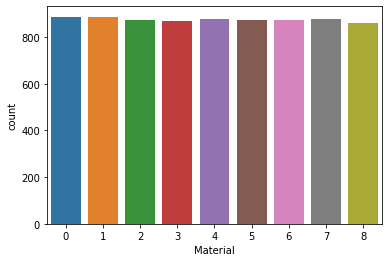

In [1237]:
sns.countplot(x = target , data=df_train)

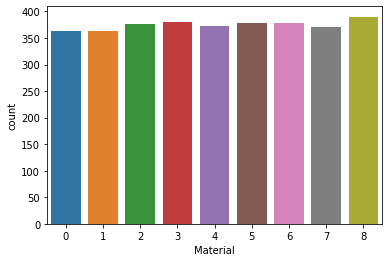

In [1238]:
sns.countplot(x = target, data=df_test)

In [1239]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(X_train, 
                       y_train)

## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(X_test)

In [1240]:
count = df_train[target].value_counts(sort=True)
max_count = count[0]
print(count)

weights = torch.FloatTensor(1/count)
print("Weights for Respective Classes:\n",weights)
# weights[2] = 0.5
# weights[3] = 0.5
# print("Weights for Respective Classes:\n",weights)

0    887
1    886
7    879
4    877
2    874
6    871
5    871
3    869
8    860
Name: Material, dtype: int64
Weights for Respective Classes:
 tensor([0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0012, 0.0012])


In [1241]:
# train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False, sampler=weighted_sampler, drop_last = True)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)


#  Added Drop_Last = True -- Was getting an error as below while training, which meant that only 1 example was there, 
#  due to uneven Batch_Size and total examples
#  ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 512])

test_loader = DataLoader(dataset=test_data, batch_size=1)

In [1242]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        # 512, 128, 64
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.4)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)

        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)

        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)

        
        x = self.layer_out(x)
        
        return x

In [1243]:
model = MulticlassClassification(num_feature = embeddings_size, num_class=NUM_CLASSES)
model.to(device)

# criterion = nn.CrossEntropyLoss(reduction='none')
# If reduction = 'none', then the loss doesn't take the mean of output. By default, it takes mean
criterion = nn.CrossEntropyLoss(weight=weights.to(device=device))
# criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learn_rate)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=12, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=9, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.4, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [1244]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
#     acc = torch.round(acc) * 100
    acc = acc * 100
    
    return acc

In [1245]:
# Creating a dataframe for ease
column_names = ["epochs", "loss", "accuracy", "elapsed_time"]
df_model = pd.DataFrame(columns = column_names )



model.train()
for epoch in range(steps):
    epoch_loss = 0
    epoch_acc = 0
    start = time.time()
    elapsed_time = 0

    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()

        y_train_pred = model(X_train_batch)
        
#         x, y_pred_tags = torch.max(torch.log_softmax(y_train_pred, dim = 1), dim = 1)
#         print(x)
#         print("Shape of Predicted Output: ", y_train_pred.shape)
#         print("Shape of Target: ", y_train_batch.shape)

        temp = torch.squeeze(y_train_batch)
#         print(temp)
#         Required the target(output) to be a single dimensional list/array/tensor and not a (m, 1) tensor

#         train_loss = criterion(y_train_pred, torch.max(y_train_batch, 1)[1])
#         same attempt as above to rectify the error: multi-classification not supported in the Cross Entropy loss

        train_loss = criterion(y_train_pred, temp)
        train_acc = multi_acc(y_train_pred, temp)

        train_loss.backward()
        optimizer.step()
        
        epoch_loss += train_loss.item()
        epoch_acc += train_acc.item()
        
    end = time.time()
    elapsed_time = end - start 
    loss = epoch_loss/len(train_loader)
    accuracy = epoch_acc/len(train_loader)
        

#     Saving values to a dataframe
    df_model.at[epoch, 'epochs'] = epoch
    df_model.at[epoch, 'loss'] = loss
    df_model.at[epoch, 'accuracy'] = accuracy
    df_model.at[epoch, 'elapsed_time'] = elapsed_time    
    if epoch % 10 == 0:
        print(f'Epoch {epoch+0:03}: | Loss: {loss:.5f} | Acc: {accuracy:.3f} | Time: {elapsed_time}')
#         print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f} | Time: {elapsed_time}')
    

Epoch 000: | Loss: 2.10736 | Acc: 21.271 | Time: 0.08148694038391113
Epoch 010: | Loss: 1.20442 | Acc: 53.826 | Time: 0.07986927032470703
Epoch 020: | Loss: 0.99438 | Acc: 59.830 | Time: 0.08528637886047363
Epoch 030: | Loss: 0.91406 | Acc: 62.516 | Time: 0.07812356948852539
Epoch 040: | Loss: 0.85602 | Acc: 64.441 | Time: 0.08590269088745117
Epoch 050: | Loss: 0.81976 | Acc: 65.867 | Time: 0.07668423652648926
Epoch 060: | Loss: 0.80909 | Acc: 66.771 | Time: 0.43229126930236816
Epoch 070: | Loss: 0.78697 | Acc: 68.170 | Time: 0.07781767845153809
Epoch 080: | Loss: 0.79323 | Acc: 67.674 | Time: 0.08035159111022949
Epoch 090: | Loss: 0.76097 | Acc: 68.648 | Time: 0.08075737953186035
Epoch 100: | Loss: 0.75172 | Acc: 69.115 | Time: 0.07770800590515137
Epoch 110: | Loss: 0.73565 | Acc: 69.957 | Time: 0.07720208168029785
Epoch 120: | Loss: 0.73740 | Acc: 70.262 | Time: 0.07858395576477051
Epoch 130: | Loss: 0.72408 | Acc: 69.986 | Time: 0.08946371078491211
Epoch 140: | Loss: 0.72062 | Acc: 

In [1246]:
# Checking the dataframe
df_model.head()

,epochs,loss,accuracy,elapsed_time
0,0,2.10736,21.2707,0.0814869
1,1,1.82487,35.9292,0.0931103
2,2,1.68404,40.1961,0.0810661
3,3,1.57634,43.6298,0.0812149
4,4,1.48863,46.268,0.0813982


## Testing the Model

In [1247]:
y_pred_list = []

with torch.no_grad():
    model.eval()
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_softmax = torch.softmax(y_test_pred, dim = 1)
        _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
#         print("Y Pred: ", y_test_pred)
#         y_pred_tags = y_test_pred.argmax(dim = -1)
        y_pred_list.append(y_pred_tags.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_pred_tensor = torch.FloatTensor(y_pred_list)

#### Confusion Matrix

In [1248]:
matrix = confusion_matrix(y_test, y_pred_tensor)

matrix

array([[351,   0,   0,   0,   1,   0,   0,   7,   4],
       [  0, 243,   0,   0,   0,  29,  72,   4,  16],
       [  0,   0, 375,   0,   0,   1,   0,   0,   0],
       [  2,   0,   0, 317,  41,  19,   1,   0,   0],
       [  1,   3,   0,  35, 281,  31,  22,   0,   0],
       [  0,  53,   0,  38,  52, 211,  25,   0,   0],
       [  3,  53,   0,   0,   9,  27, 207,   9,  71],
       [  5,   8,   0,   3,   0,   0,  25, 235,  95],
       [  2,  27,   0,   0,   2,   2,  67,  91, 199]])

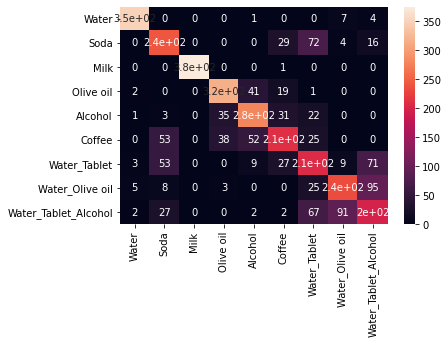

In [1249]:
decode_map = {
    0: 'Water',
    1: 'Soda',
    2: 'Milk',
    3: 'Olive oil',
    4: 'Alcohol',
    5: 'Coffee',
    6: 'Water_Tablet',
    7: 'Water_Olive oil',
    8: 'Water_Tablet_Alcohol',
    # 9: 'Water_Milk',
    }

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list)).rename(columns=decode_map, index=decode_map)

sns.heatmap(confusion_matrix_df, annot=True)

In [1250]:

confusion_matrix_df

,Water,Soda,Milk,Olive oil,Alcohol,Coffee,Water_Tablet,Water_Olive oil,Water_Tablet_Alcohol
Water,351,0,0,0,1,0,0,7,4
Soda,0,243,0,0,0,29,72,4,16
Milk,0,0,375,0,0,1,0,0,0
Olive oil,2,0,0,317,41,19,1,0,0
Alcohol,1,3,0,35,281,31,22,0,0
Coffee,0,53,0,38,52,211,25,0,0
Water_Tablet,3,53,0,0,9,27,207,9,71
Water_Olive oil,5,8,0,3,0,0,25,235,95
Water_Tablet_Alcohol,2,27,0,0,2,2,67,91,199


In [1251]:
# Creating dataframe to store matrix
one_col = matrix[:,0]
second_col = matrix[:,1]
third_col = matrix[:,2]
fourth_col = matrix[:,3]
fifth_col = matrix[:, 4]
sixth_col = matrix[:, 5]
seventh_col = matrix[:, 6]
eighth_col = matrix[:, 7]
ninth_col = matrix[:, 8]
# tenth_col = matrix[:, 9]


column_title_actual = ["Act_Water", "Act_Soda", "Act_Milk", "Act_Olive oil", "Act_Alcohol", "Act_Coffee", \
                       "Act_Water_Tablet", "Act_Water_Olive Oil", "Act_Water_Tablet_Alcohol"]
column_title_predicted = ['Category','Pred_Water', 'Pred_Soda', 'Pred_Milk', 'Pred_Olive oil', 'Pred_Alcohol', "Pred_Coffee", \
                          "Pred_Water_Tablet", "Pred_Water_Olive Oil", "Pred_Water_Tablet_Alcohol"]
df_confusion = pd.DataFrame(columns = column_title_predicted)
df_confusion['Category'] = column_title_actual
df_confusion['Pred_Water'] = one_col
df_confusion['Pred_Soda'] = second_col
df_confusion['Pred_Milk'] = third_col
df_confusion['Pred_Olive oil'] = fourth_col
df_confusion['Pred_Alcohol'] = fifth_col
df_confusion['Pred_Coffee'] = sixth_col
df_confusion['Pred_Water_Tablet'] = seventh_col
df_confusion['Pred_Water_Olive Oil'] = eighth_col
df_confusion['Pred_Water_Tablet_Alcohol'] = ninth_col
# df_confusion['Pred_Water_Milk'] = tenth_col

df_confusion.head(10)

,Category,Pred_Water,Pred_Soda,Pred_Milk,Pred_Olive oil,Pred_Alcohol,Pred_Coffee,Pred_Water_Tablet,Pred_Water_Olive Oil,Pred_Water_Tablet_Alcohol
0,Act_Water,351,0,0,0,1,0,0,7,4
1,Act_Soda,0,243,0,0,0,29,72,4,16
2,Act_Milk,0,0,375,0,0,1,0,0,0
3,Act_Olive oil,2,0,0,317,41,19,1,0,0
4,Act_Alcohol,1,3,0,35,281,31,22,0,0
5,Act_Coffee,0,53,0,38,52,211,25,0,0
6,Act_Water_Tablet,3,53,0,0,9,27,207,9,71
7,Act_Water_Olive Oil,5,8,0,3,0,0,25,235,95
8,Act_Water_Tablet_Alcohol,2,27,0,0,2,2,67,91,199


#### Classification Report

In [1266]:
classification_names = ["Water", "Soda", "Milk", "Olive oil", "Alcohol", "Coffee", \
                        "Water_Tablet", "Water_Olive Oil", "Water_Tablet_Alcohol"]
report = classification_report(y_test, y_pred_list, output_dict=True)
print(classification_report(y_test, y_pred_list, target_names=classification_names))

#  Printing Dictionary Values
# for value in report.values():
#     print(value)

                      precision    recall  f1-score   support

               Water       0.96      0.97      0.97       363
                Soda       0.63      0.67      0.65       364
                Milk       1.00      1.00      1.00       376
           Olive oil       0.81      0.83      0.82       380
             Alcohol       0.73      0.75      0.74       373
              Coffee       0.66      0.56      0.60       379
        Water_Tablet       0.49      0.55      0.52       379
     Water_Olive Oil       0.68      0.63      0.66       371
Water_Tablet_Alcohol       0.52      0.51      0.51       390

            accuracy                           0.72      3375
           macro avg       0.72      0.72      0.72      3375
        weighted avg       0.72      0.72      0.72      3375



#### Mean & Standard Deviation

In [1267]:
mean = statistics.mean(y_pred_list)
stdev = statistics.stdev(y_pred_list, xbar = mean)

report.update(mean = mean)
report.update(standard_dev = stdev)
print(f'Overall Statistics | Mean {mean:.4f} | Standard Deviation {stdev:.4f}')
for key in report.keys():
    print(key)

Overall Statistics | Mean 3.9929 | Standard Deviation 2.5806
0
1
2
3
4
5
6
7
8
accuracy
macro avg
weighted avg
mean
standard_dev


#### ROC - AUC Curve Score

In [1268]:
from pytorch_lightning.metrics.functional import auc, auroc
# from pytorch_lightning.metrics.classification import AUROC, MulticlassROC, ROC

In [1269]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [1270]:
# print(y_test.shape

y_test_squeezed = torch.squeeze(y_test)
y_test_array = y_test_squeezed.detach().cpu().numpy()
y_pred_array = np.array(y_pred_list)

# print(result.shape)
# roc_auc_score(y_test_squeezed, y_pred_tensor, average = "macro", multi_class = "ovo")
AUC_ROC = multiclass_roc_auc_score(y_test_squeezed, y_pred_list)
print("AUROC Score: ", AUC_ROC)

AUROC Score:  0.8415061401426427


In [1271]:
print(y_test_squeezed.shape)
print(y_pred_tensor.shape)

torch.Size([3375])
torch.Size([3375])


In [1272]:
# area_under_curve = auc(y_test_squeezed, y_pred_tensor)
# print("AUC Score: ", area_under_curve)
# MulticlassROC(y_test_array, y_pred_array)

In [1273]:
# report.update(AUC = area_under_curve.item())
report.update(AUROC = AUC_ROC.item())

#### Matthew Co-coefficient Score

In [1274]:
mcc = matthews_corrcoef(y_test, y_pred_list)
print("MCC Score: ", mcc)

MCC Score:  0.6815463761943733


In [1275]:
report.update(MCC = mcc)

In [1276]:
# Dataframe for Stats
df_stats = pd.DataFrame.from_dict(report)
df_stats.head()

,0,1,2,3,4,5,6,7,8,accuracy,macro avg,weighted avg,mean,standard_dev,AUROC,MCC
precision,0.964286,0.627907,1.000000,0.806616,0.727979,0.659375,0.494033,0.679191,0.516883,0.716741,0.719586,0.718030,3.992889,2.58064,0.841506,0.681546
recall,0.966942,0.667582,0.997340,0.834211,0.753351,0.556728,0.546174,0.633423,0.510256,0.716741,0.718445,0.716741,3.992889,2.58064,0.841506,0.681546
f1-score,0.965612,0.647137,0.998668,0.820181,0.740448,0.603720,0.518797,0.655509,0.513548,0.716741,0.718180,0.716546,3.992889,2.58064,0.841506,0.681546
support,363.000000,364.000000,376.000000,380.000000,373.000000,379.000000,379.000000,371.000000,390.000000,0.716741,3375.000000,3375.000000,3.992889,2.58064,0.841506,0.681546


In [1277]:
# Dataframe for Predicted and Actual Results
df_yield = df_test.copy()
# df_yield['Protein_Sequence'] = df_test['Sequence'].tolist()
df_yield['y_predicted'] = y_pred_list
df_yield['y_actual'] = y_test.cpu().detach().numpy()
df_yield.head()

,Material,Green_sensor,Green_IR,Green_UV,Blue_sensor,Blue_IR,Blue_UV,Red_sensor,Red_IR,Red_UV,IR_sensor,IR_IR,IR_UV,model0,y_predicted,y_actual
7875,4,0.98485,0.50000,0.50,0.98864,0.49511,0.50,0.98485,0.50098,0.50,0.99240,0.51176,0.66667,"[0.98485, 0.5, 0.5, 0.98864, 0.49511, 0.5, 0.9...",4,4
7876,1,0.98106,0.49608,0.25,0.98106,0.49511,0.25,0.97727,0.49511,0.25,0.99240,0.50980,0.66667,"[0.98106, 0.49608, 0.25, 0.98106, 0.49511, 0.2...",1,1
7877,5,0.98485,0.49804,0.50,0.99242,0.49511,0.75,0.98485,0.49706,0.50,0.98859,0.51961,0.66667,"[0.98485, 0.49804, 0.5, 0.99242, 0.49511, 0.75...",5,5
7878,6,0.99242,0.49804,0.75,0.98864,0.49511,0.50,0.98864,0.49902,0.50,0.99240,0.50980,0.66667,"[0.99242, 0.49804, 0.75, 0.98864, 0.49511, 0.5...",6,6
7879,6,0.98864,0.50000,0.50,0.99242,0.49706,0.75,0.98485,0.49902,0.50,0.99240,0.50980,0.66667,"[0.98864, 0.5, 0.5, 0.99242, 0.49706, 0.75, 0....",6,6


## Saving the Resultant Dataframe and Dictionaries

In [1278]:
## Saving the loss results, and overall statistics
model_name = 'model0'
print("The Saved Model is:", model_name)
model_file = 'model_loss_' + model_name +'.csv'
confusion_file = 'confusion_matrix_' + model_name + '.csv'
stats_file = 'general_stats_' + model_name + '.csv'
predicted_file = 'predicted_output_' + model_name + '.csv'

The Saved Model is: model0


In [1279]:
# Saving the Model Loss, Accuracy and Time
df_model.to_csv(os.path.join(log_file, model_file))
# Saving the Confusion Matrix
df_confusion.to_csv(os.path.join(log_file, confusion_file))
# Saving the Overall Statistics, including Recall, Mean, F1-Score
df_stats.to_csv(os.path.join(log_file, stats_file))
# Saving the Predicted and Actual Results
df_yield.to_csv(os.path.join(log_file, predicted_file))

# with open(os.path.join(log_file,results), 'w') as f:
#     json.dump(time_loss_shallow, f)